<a href="https://colab.research.google.com/github/cleysonl/Pytorch/blob/master/DeepNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [0]:
n_pts = 500
centers = [[-0.5,0.5],[0.5,-0.5]]
X, y = datasets.make_circles(n_samples = n_pts, random_state= 123, noise = 0.1, factor = 0.4)
x_data = torch.tensor(X)
y_data = torch.tensor(y.reshape(500,1))

In [0]:
# Boolean check grab me all the x coordinates that correspond to labels of zero
def scatter_plot():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])

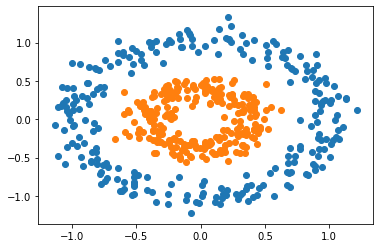

In [7]:
scatter_plot()

### **Model Setup**

In [0]:
class Model(nn.Module):
  def __init__(self,input_size, h1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, h1)
    self.linear2 = nn.Linear(h1, output_size)
  def forward(self,x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self,x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


In [24]:
torch.manual_seed(2)
# Model with 2 nodes in the input layer, 4 in the hidden layer and 1 in the output layer
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


## **Model Training**

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [28]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data.float())
  loss = criterion(y_pred, y_data)
  print('epochs:', i, 'loss:', loss.item())

  losses.append(loss.item())
  # Clear the gradient of all optimized grad
  optimizer.zero_grad()
  # Calculates the gradient
  loss.backward()
  # Perform a single optimization step for the optimizer
  optimizer.step()

RuntimeError: ignored

In [29]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data.float())
  loss = criterion(y_pred, y_data.float())
  print('epochs:', i, 'loss:', loss.item())

  losses.append(loss.item())
  # Clear the gradient of all optimized grad
  optimizer.zero_grad()
  # Calculates the gradient
  loss.backward()
  # Perform a single optimization step for the optimizer
  optimizer.step()

epochs: 0 loss: 0.052177563309669495
epochs: 1 loss: 0.05206933245062828
epochs: 2 loss: 0.05196148529648781
epochs: 3 loss: 0.051854003220796585
epochs: 4 loss: 0.05174684897065163
epochs: 5 loss: 0.051640089601278305
epochs: 6 loss: 0.05153367668390274
epochs: 7 loss: 0.05142761394381523
epochs: 8 loss: 0.05132187530398369
epochs: 9 loss: 0.05121656507253647
epochs: 10 loss: 0.051111526787281036
epochs: 11 loss: 0.05100691691040993
epochs: 12 loss: 0.05090261250734329
epochs: 13 loss: 0.05079863220453262
epochs: 14 loss: 0.0506950318813324
epochs: 15 loss: 0.05059177055954933
epochs: 16 loss: 0.05048885941505432
epochs: 17 loss: 0.050386298447847366
epochs: 18 loss: 0.05028402805328369
epochs: 19 loss: 0.05018213018774986
epochs: 20 loss: 0.05008063465356827
epochs: 21 loss: 0.04997939616441727
epochs: 22 loss: 0.04987850412726402
epochs: 23 loss: 0.04977802559733391
epochs: 24 loss: 0.0496777780354023
epochs: 25 loss: 0.04957796260714531
epochs: 26 loss: 0.0494784377515316
epochs: 2

Text(0, 0.5, 'loss')

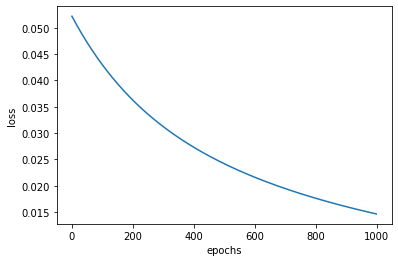

In [33]:
plt.plot(range(epochs),losses)
plt.xlabel('epochs')
plt.ylabel('loss')